libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from termcolor import colored

from sklearn import set_config
from sklearn.manifold import TSNE
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.cluster import KMeans, MiniBatchKMeans, MeanShift, estimate_bandwidth, AffinityPropagation, Birch, DBSCAN, OPTICS, AgglomerativeClustering

import scipy.cluster.hierarchy as sch
    
from yellowbrick.cluster import KElbowVisualizer
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import  silhouette_score
from sklearn import datasets
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import dendrogram
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler,MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer, SimpleImputer

from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest

In [2]:
#Load dataset
cc_data = pd.read_csv('Customer_Data.csv')

Preprocessing

In [3]:
cc_data.shape

(8950, 18)

In [4]:
cc_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
cc_data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
#drop column CUST_ID
cc_data = cc_data.drop('CUST_ID', axis=1)

In [7]:
cc_data[cc_data.MINIMUM_PAYMENTS.isna()]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


<Axes: >

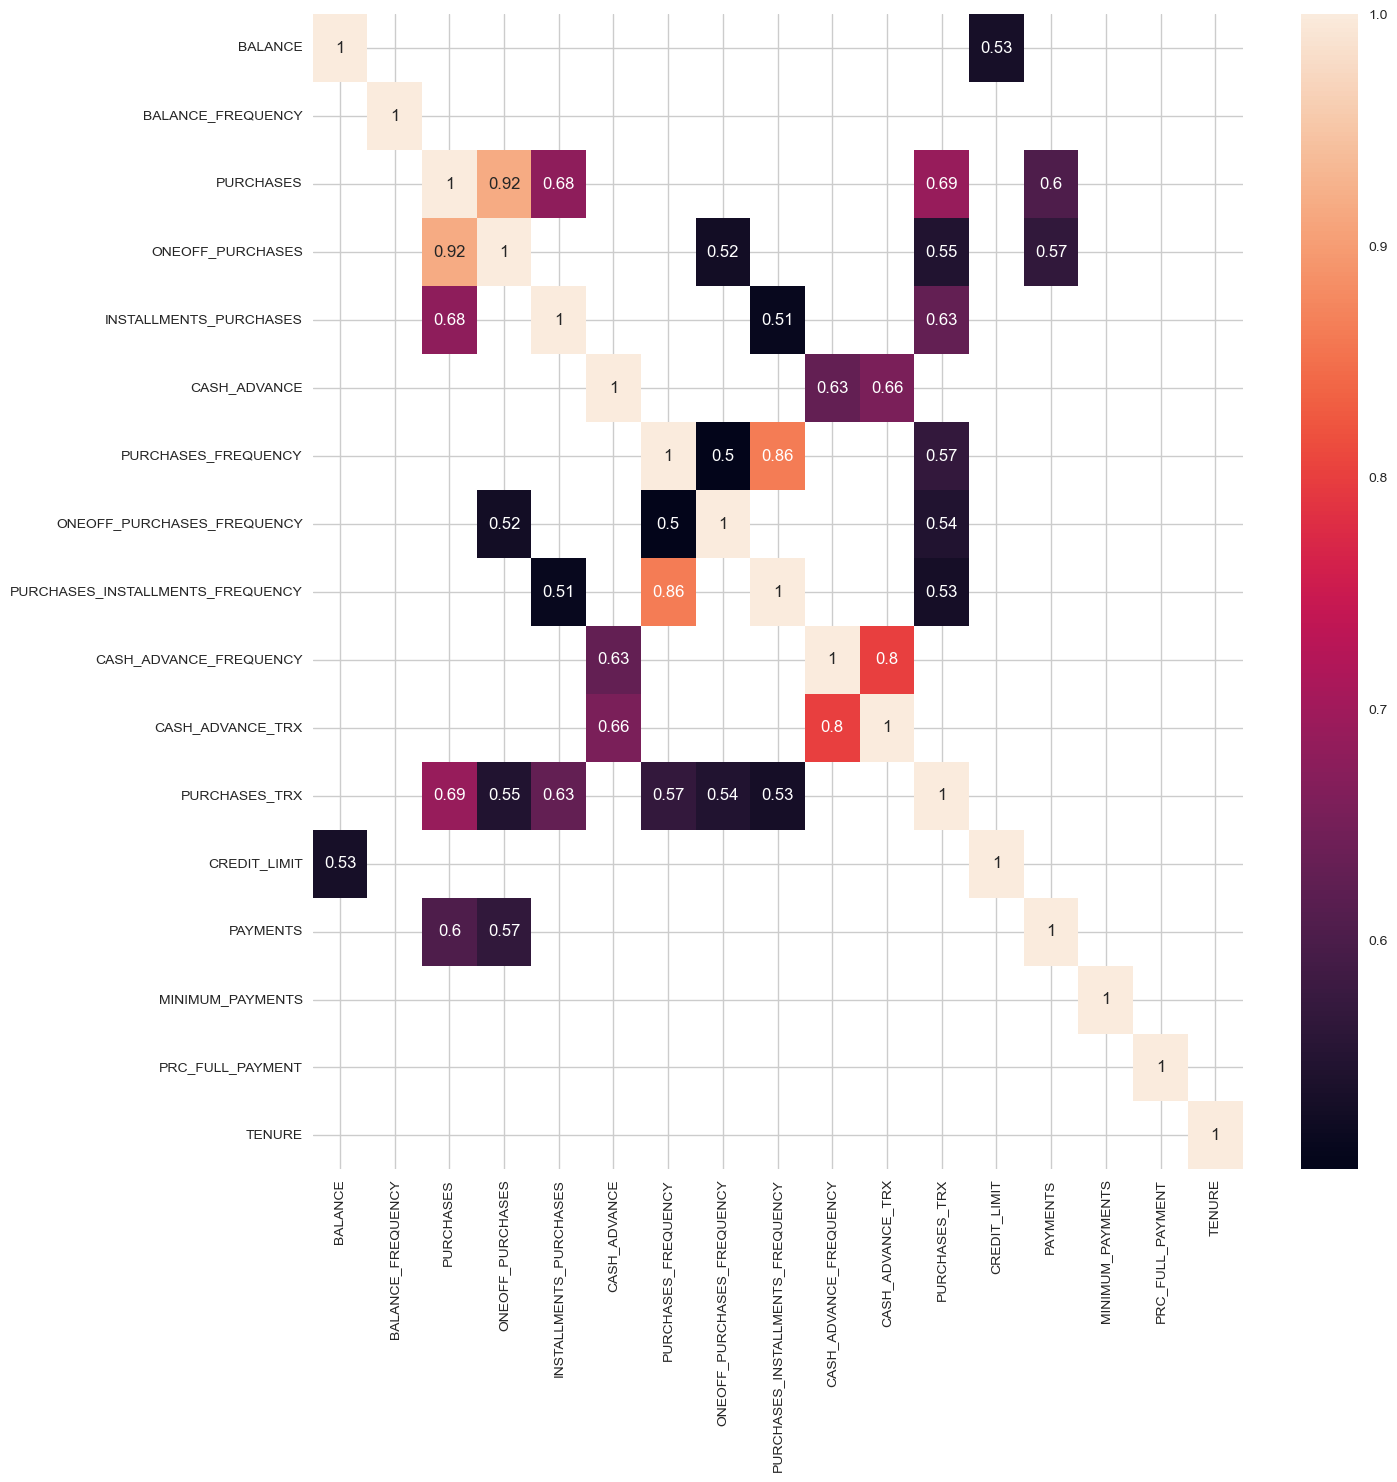

In [8]:
#check correlation of data
corr = cc_data.corr()
high_corr = corr[abs(corr) > 0.5]
plt.figure(figsize=(15,15))
sns.heatmap(high_corr, annot = True)

In [9]:
imputer = SimpleImputer(missing_values = np.nan, 
                        strategy ='median')
imputer.fit(cc_data)
cc_data = pd.DataFrame(imputer.transform(cc_data), columns = cc_data.columns)

In [10]:
cc_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,312.343947,0.000000,12.0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,325.594462,48.886365,0.500000,6.0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,275.861322,312.343947,0.000000,6.0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0.0,5.0,1000.0,81.270775,82.418369,0.250000,6.0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2.0,0.0,500.0,52.549959,55.755628,0.250000,6.0


Normalising the data - Data Transformation: To ensure every feature contributes equally to our analysis, we scaled all of them to have a mean of 0 and a standard deviation of 1. This is especially crucial for clustering algorithms, which are sensitive to the scale of the data.

In [11]:
ss = StandardScaler()
#fit scaler on numeric features
ss.fit(cc_data)
#scale numeric features now
X = ss.transform(cc_data)

Outlier detection-Isolation Forest because it is a bigf dataset

In [12]:
# Use isolation Forest to detect anomalies in our training data
iforest = IsolationForest(max_samples=50,bootstrap=True, n_jobs=-1,verbose=True)
pred= iforest.fit_predict(X)
# Create two new columns with the outcome of the isolation forest.
# "scores" for the Average anomaly score of X of the base classifiers. Negative Values are outleirs.
cc_data['scores']=iforest.decision_function(X)
cc_data['anomaly_label']=pred
# -1 outcome of "fit_predict" function indicates an anomaly of data or an outlier in other words.
cc_data['anomaly']=cc_data['anomaly_label'].apply(lambda x: 'outlier' if x==-1  else 'inlier')

[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done   2 out of  28 | elapsed:    0.0s remaining:    0.3s
[Parallel(n_jobs=28)]: Done  28 out of  28 | elapsed:    0.0s finished


To highlight this relationship between the anomaly scores and the labels obtained with the prediction, we can display the histogram. Before creating the histogram, I added a column that indicates the anomaly state.

In [13]:
fig=px.histogram(cc_data,x='scores',color='anomaly')
fig.show()

Putting the cursor on top of the negative value bins we can see how many outliers are detected by the method

In [14]:
#Keep only inliners
cc_data=cc_data[cc_data.anomaly_label==1]

Number of observations is reduced now because we removed the outliers detected

In [15]:
cc_data.shape

(7112, 20)

We can now bring back the dataset to the original columns by removing those created recently

In [16]:
cc_data=cc_data.drop(columns=["scores","anomaly_label","anomaly"])

In [17]:
cc_data.shape

(7112, 17)

Data Reduction: While dimensionality reduction can be beneficial, especially with a large number of features, it’s essential to ensure that we don’t lose significant information in the process. We applied Principal Component Analysis (PCA) to understand the variance explained by different components.

In [18]:
X=cc_data
# Fit PCA with all components to determine explained variance
pca = PCA()
pca.fit(X)
# Explained variance ratio shows the proportion of dataset's variance that lies along 
#the axis of each principal component
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance)
# Often, we want to keep only the components that explain significant variance.
# A rule of thumb is to keep the components that add up to a cumulative variance of 0.99 or higher.
cumulative_variance = explained_variance.cumsum()
n_components = (cumulative_variance < 0.99).sum() + 1
n_components
# Now we fit PCA with the optimal number of components found
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)
X_pca


Explained variance ratio: [5.38431825e-01 2.02104497e-01 1.05032136e-01 6.95729288e-02
 4.75526695e-02 2.55173114e-02 1.17809433e-02 5.56389837e-06
 1.46971839e-06 5.46818405e-07 9.14024583e-08 7.44780011e-09
 3.21618084e-09 3.01598543e-09 2.11385543e-09 3.49161182e-10
 2.25744871e-10]


array([[-2953.91758885,  -647.46292276,  -385.25184463, ...,
         -125.50565208,  -211.21244497,   -22.33269681],
       [ 3945.87581808,  -115.59870839,  -321.95496266, ...,
         1162.94522487,   -72.89519482,  -423.34404829],
       [ 3768.94886838,  -828.81949375,  -817.98762669, ...,
         1105.37837959,  1070.45198963,  -830.49616052],
       ...,
       [-2930.80727322,  -514.32868735,  -499.1769751 , ...,
          -99.41206307,   -69.40161804,   143.76373107],
       [-2970.83963562,  -718.62459287,  -411.43924562, ...,
          -78.78118956,  -121.04496455,    24.30440002],
       [-3466.43565031,  -659.05684731,  -278.61424283, ...,
         -119.7408154 ,  -198.2571348 ,   -97.38907104]])

In [19]:
# Create a DataFrame for the PCA results
pca_cc_data = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components)])
pca_cc_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-2953.917589,-647.462923,-385.251845,-488.767468,-125.505652,-211.212445,-22.332697
1,3945.875818,-115.598708,-321.954963,-630.692241,1162.945225,-72.895195,-423.344048
2,3768.948868,-828.819494,-817.987627,-553.241692,1105.378380,1070.451990,-830.496161
3,-2550.595750,-193.058005,117.174209,-282.865433,199.572119,-561.424648,-92.794518
4,-1525.683283,2003.433381,-507.153397,1008.372085,802.998508,155.204099,1022.771492
...,...,...,...,...,...,...,...
7107,35.752033,-961.829240,-1094.805591,-319.290386,277.095536,711.140770,-645.313519
7108,-2934.320179,-731.852407,-354.239543,-263.293579,-61.321092,-110.373290,141.145885
7109,-2930.807273,-514.328687,-499.176975,-288.894403,-99.412063,-69.401618,143.763731
7110,-2970.839636,-718.624593,-411.439246,-554.919338,-78.781190,-121.044965,24.304400


K -means clustering

with elbow method

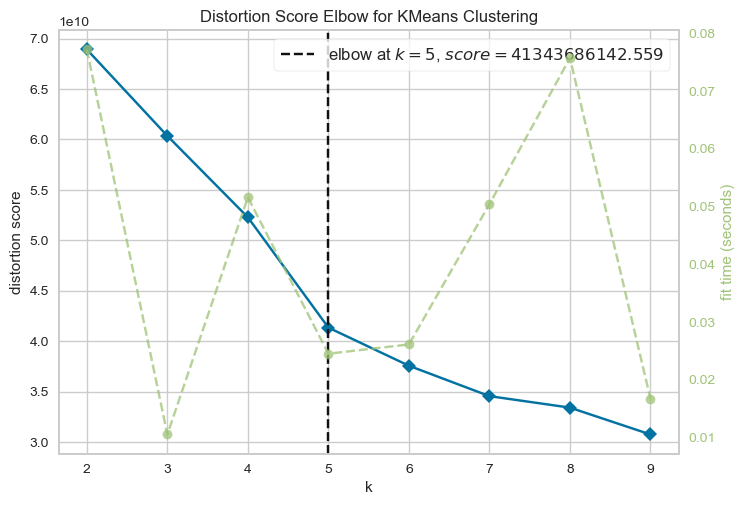

In [20]:
#Instantiate the clustering model and visualizer
model = KMeans(n_init='auto')
visualizer = KElbowVisualizer(model, k=(2,10), locate_elbow=True)

visualizer.fit(X_pca)        # Fit the data to the visualizer
visualizer.poof()        # Draw/show/poof the data
plt.show()

In [21]:
'''k means - determine optimal k'''
K = range(2,10)
kmeans = [KMeans(n_clusters=k, n_init='auto') for k in K]
score = [kmeans[k].fit(X_pca).score(X_pca) for k in range(len(kmeans))]

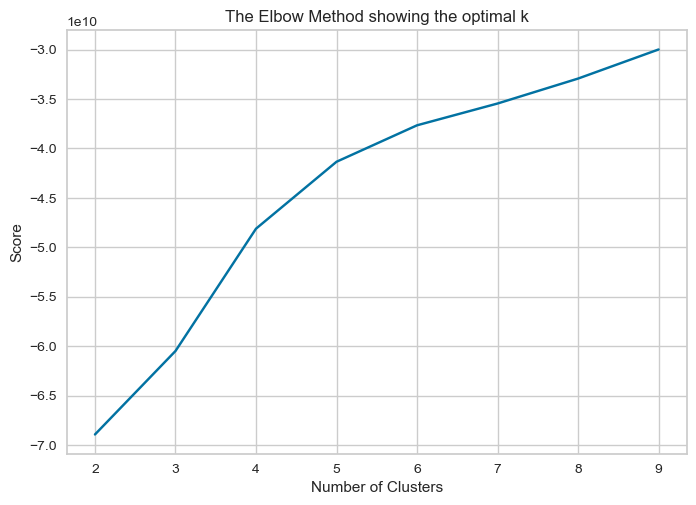

In [22]:
'''plot the elbow'''
plt.plot(K, score, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('The Elbow Method showing the optimal k')
plt.show()

According to the elbow method, the ideal number of clusters for the kmeans algorithm is determined to be 4.

Kmeans 
with Silhouette Score

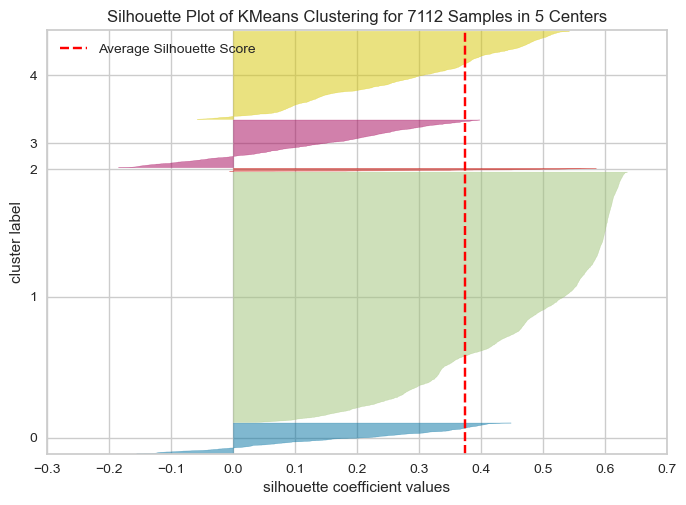

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 7112 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [23]:
# Instantiate the clustering model and visualizer
model = KMeans(5, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X_pca)        # Fit the data to the visualizer
visualizer.poof()        # Draw/show/poof the data

----------------------------------------------------------------------
For n_clusters = 2 The average silhouette_score is : 0.4667039696833619


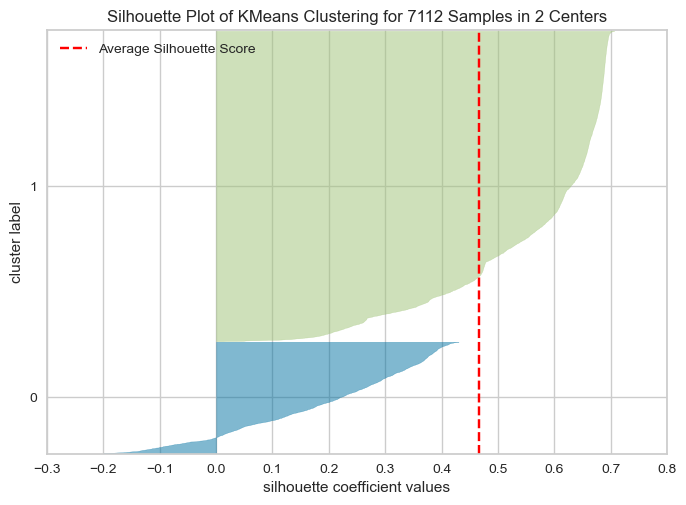

----------------------------------------------------------------------
For n_clusters = 3 The average silhouette_score is : 0.47656336153277445


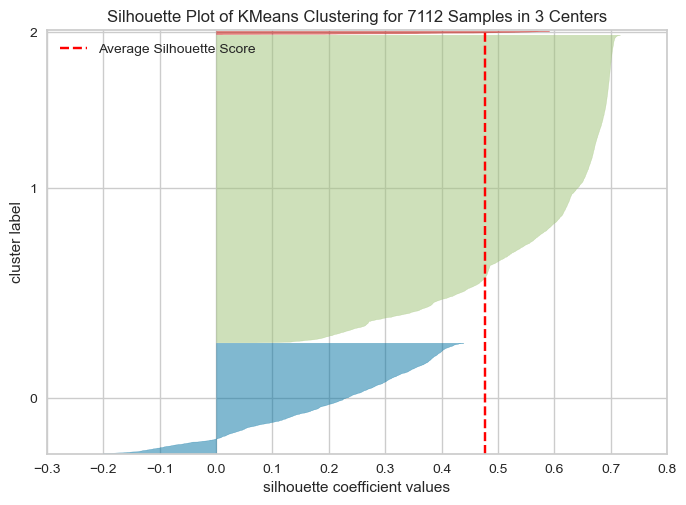

----------------------------------------------------------------------
For n_clusters = 4 The average silhouette_score is : 0.459402529509503


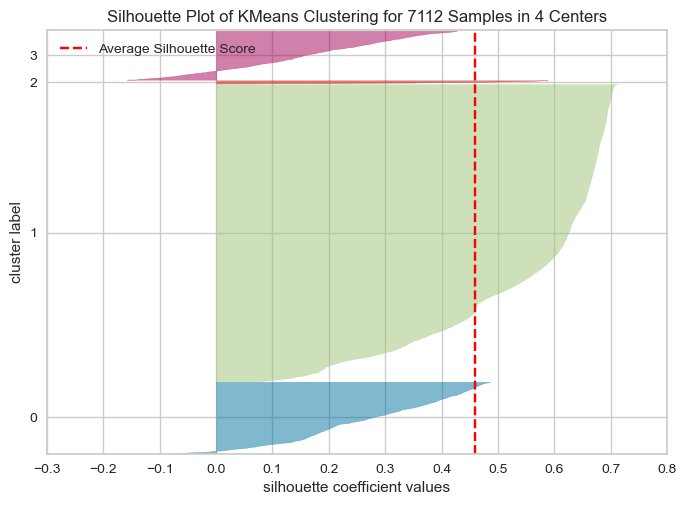

----------------------------------------------------------------------
For n_clusters = 5 The average silhouette_score is : 0.3736734172164529


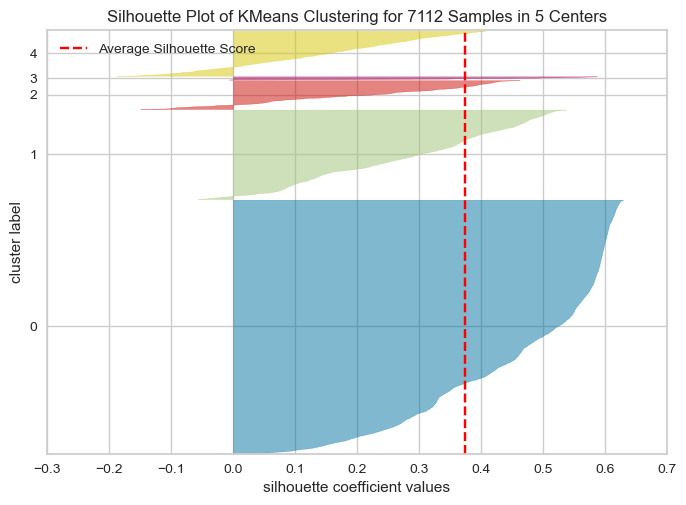

----------------------------------------------------------------------
For n_clusters = 6 The average silhouette_score is : 0.3290734386921295


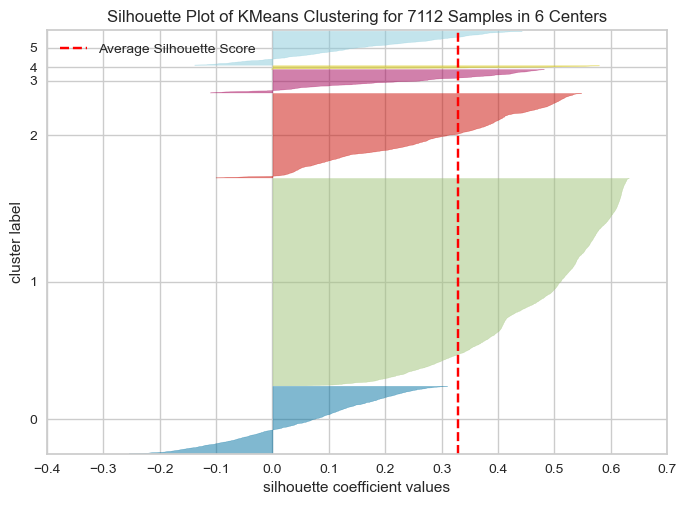

----------------------------------------------------------------------
For n_clusters = 7 The average silhouette_score is : 0.27799741672425204


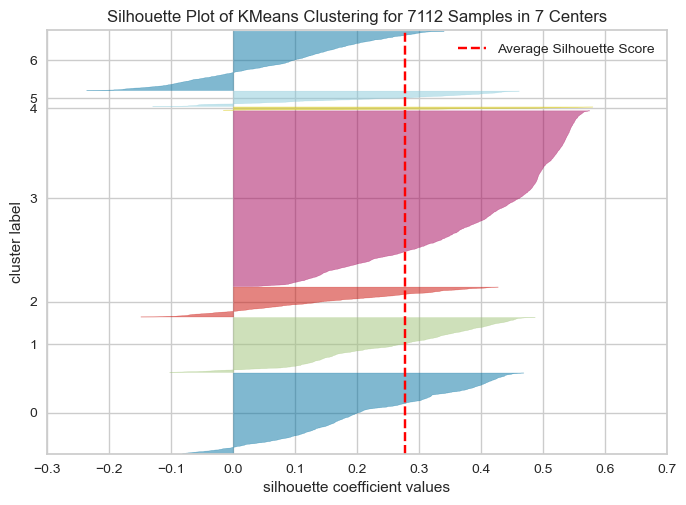

In [24]:
search_name = 'kmeans'

n_clusters = np.arange(2,8,1).tolist()

for n_clusters in n_clusters:

    print('-'*70)

    model = KMeans()

    param_dict = {'n_clusters': n_clusters,
                  'n_init': 10,
                  'random_state':42,
                 'algorithm':'lloyd'
                 }

    model.set_params(**param_dict)
    labels = model.fit_predict(X_pca)

    silhouette_avg = silhouette_score(X_pca, labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

    visualizer.fit(X_pca)        # Fit the data to the visualizer
    visualizer.poof()

optimum number of clusers is determined to be 4.

Lets break down the PCs - PCA ANALYSIS:

In [25]:
components = pca.components_
components_df = pd.DataFrame(components, columns=cc_data.columns)
components_df

#Set a threshold for significant features
threshold = 0.57  # This can be adjusted based on your preference

#Determine significant features for each principal component
significant_features = (components_df.abs() > threshold).apply(lambda x: cc_data.columns[x].tolist(), axis=1)

for i, features in enumerate(significant_features):
    print(f"Principal Component {i+1}: {features}")

Principal Component 1: ['CREDIT_LIMIT']
Principal Component 2: ['MINIMUM_PAYMENTS']
Principal Component 3: ['CASH_ADVANCE']
Principal Component 4: ['PAYMENTS']
Principal Component 5: ['BALANCE', 'CASH_ADVANCE']
Principal Component 6: ['PURCHASES']
Principal Component 7: ['ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES']
